In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import sqlite3
import pandas as pd

In [2]:
chicken_recipe_df = pd.read_csv('Resources/chicken_recipe.csv')
co2_df = pd.read_csv('Resources/co2.csv')

In [3]:
# Display summary statistics for chicken_recipe_df
summary_statistics_chicken = chicken_recipe_df.describe()

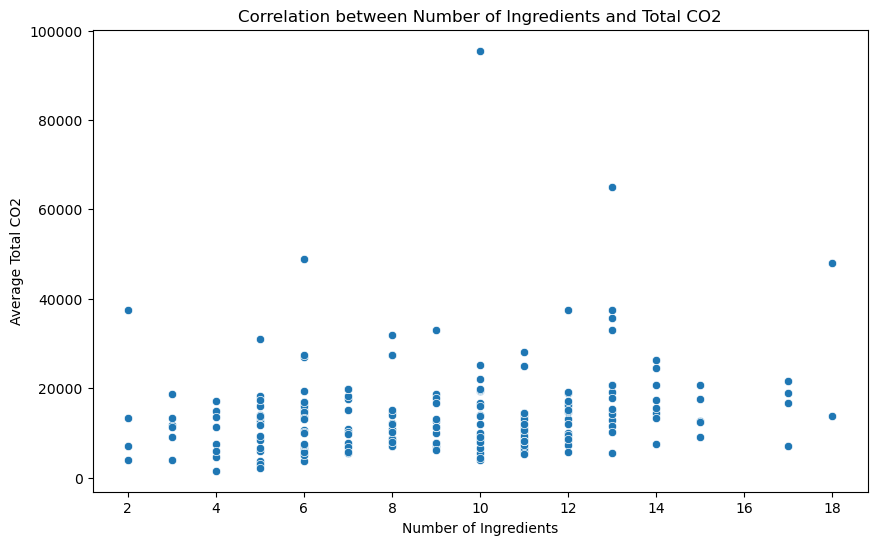

In [4]:
# Calculate average CO2 emissions per recipe and merge with co2_df
avg_co2_per_recipe = co2_df.groupby('recipe_id')['total_co2'].mean().reset_index()
co2_df = co2_df.merge(avg_co2_per_recipe, on='recipe_id', how='left', suffixes=('_original', '_average'))

# Perform the scatter plot for CO2 data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_ingredients', y='total_co2_average', data=co2_df)
plt.title('Correlation between Number of Ingredients and Total CO2')
plt.xlabel('Number of Ingredients')
plt.ylabel('Average Total CO2')
plt.show()

In [5]:
# Calculate average CO2 emissions per recipe
avg_co2_per_recipe = co2_df.groupby('recipe_id')['total_co2_original'].mean().reset_index()

# Display available recipes to the user
print("Available Recipes:")
for index, recipe in enumerate(chicken_recipe_df['recipe_name']):
    print(f"{index + 1}. {recipe}")

# Get user input for recipe selection
selected_recipe_index = int(input("\nEnter the number corresponding to the recipe you want to select: ")) - 1

# Check if the selected index is valid
if 0 <= selected_recipe_index < len(chicken_recipe_df):
    selected_recipe_id = chicken_recipe_df.iloc[selected_recipe_index]['recipe_id']

    # Get the corresponding average CO2 content
    avg_co2_content = avg_co2_per_recipe[avg_co2_per_recipe['recipe_id'] == selected_recipe_id]['total_co2_original'].values[0]

    # Display information
    selected_cuisine_type = chicken_recipe_df.iloc[selected_recipe_index]['cuisine_type']
    formatted_cuisine_type = ''.join(selected_cuisine_type).replace(' ', '')  # Remove spaces
    print(f"\nRecipe: {chicken_recipe_df.iloc[selected_recipe_index]['recipe_name']}")
    print(f"CO2 Content: {avg_co2_content} grams")
    print(f"Average Calories per Serving: {chicken_recipe_df.iloc[selected_recipe_index]['calories_per_serving']} calories")
    print(f"Total Time per Recipe: {chicken_recipe_df.iloc[selected_recipe_index]['total_time']} minutes")
    print(f"Cuisine Type: {formatted_cuisine_type}")
else:
    print("Invalid selection. Please choose a valid recipe.")

Available Recipes:
1. Poached Chicken for Tacos
2. Chicken Broth
3. Fig & Balsamic Chicken
4. Basic Roast Chicken
5. Ultimate Roast Chicken
6. Chicken & peppers
7. Chicken Tamales
8. Chicken biryani
9. Roast Chicken With Chicken Livers
10. Chicken Carbonara
11. Chicken Parmigiana recipes
12. Chicken Piccata
13. Chicken Tacos
14. Homemade Essence of Chicken
15. Chicken Fricassee
16. Lemon & Caper Chicken
17. Chicken Piccata
18. Chicken paprika
19. Chicken Liver Pâté
20. Chicken Kiev
21. Chicken Piccata
22. Quinoa-Crusted Chicken
23. Chicken Piccata Hilary
24. Braised Chicken Gumbo
25. Chicken Marengo
26. Chicken Pie
27. Firecracker Chicken
28. Chicken soup
29. Chicken Teriyaki
30. Chicken Potpies
31. Chicken & sweetcorn ramen
32. Barbecued Chicken
33. Chicken Piccata
34. Roast Chicken Breasts With Chicken Gravy
35. Lemon Chicken
36. Chicken Satay
37. Chicken Quinoa
38. Chicken Broth
39. Braised Chicken Sausages
40. Chicken Paillard
41. Crispy Chicken Dippers
42. Southwestern Chicken Sou